# Time Series Specificities and Data Visualization


This notebook deals with the implementation of some tools and tips let us better investigate the properties of the time series data.
Seaborn and Plotly libraries have been used for this purpose.

The data in this exercise is used to build an algorithm to detect windows that are abnormal. Actually there is no information about the anomalies.


In [2]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
sns.set()
import os

## Obtaining and scrubbing the data

In [3]:
#load the dataset
df=pd.read_csv('dataset_p11.txt')
df.head()


day_cycle_window        p1        p2        p3        p4        p5       p6  \
0            1_1_1 -0.805191 -1.141993 -1.328327 -1.516693 -1.373962 -0.80827   
1            1_1_1 -0.805191 -1.134902 -1.320393 -1.505848 -1.361560 -0.80784   
2            1_1_1 -0.805191 -1.117304 -1.307167 -1.505848 -1.361560 -0.80784   
3            1_1_1 -0.814231 -1.114206 -1.287593 -1.442302 -1.287565 -0.80784   
4            1_1_1 -0.848104 -1.112276 -1.285393 -1.429076 -1.270722 -0.80784   

         p7        p8        p9       p10       p11  
0 -1.070547 -0.504352  2.807146  0.495528 -1.246737  
1 -1.064212 -0.516000  2.894177  0.494467 -1.244472  
2 -1.064212 -0.516000  2.981904  0.429370 -1.244472  
3 -1.045557 -0.516000  3.063298  0.348056 -1.244472  
4 -1.017575 -0.664906  3.049237  0.118828 -1.270237

Aircraft system records 11 parameters values for different days. In each day we have a certain number of cycles where we find n window. 
A window is a section of measures, thus the parameter 4_2_1 indicates:
DAY 4, CYCLE 2, WINDOW 1.



In [59]:
print(df.shape)
dcyw_number=df['day_cycle_window'].unique()
print('Number of total Windows: {}'.format(dcyw_number.shape[0]))
df.groupby('day_cycle_window').count()


(162702, 12)
Number of total Windows: 1637


p1   p2   p3   p4   p5   p6   p7   p8   p9  p10  p11
day_cycle_window                                                       
1_1_1             100  100  100  100  100  100  100  100  100  100  100
1_1_10            100  100  100  100  100  100  100  100  100  100  100
1_1_11            100  100  100  100  100  100  100  100  100  100  100
1_1_12            100  100  100  100  100  100  100  100  100  100  100
1_1_13            100  100  100  100  100  100  100  100  100  100  100
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
4_4_95            100  100  100  100  100  100  100  100  100  100  100
4_4_96            100  100  100  100  100  100  100  100  100  100  100
4_4_97            100  100  100  100  100  100  100  100  100  100  100
4_4_98            100  100  100  100  100  100  100  100  100  100  100
4_4_99            100  100  100  100  100  100  100  100  100  100  100

[1637 rows x 11 columns]

In [102]:
#Windows have not the same sequence length. Probably feature extraction should be implemented.
len_dcyw=[]
for c in df['day_cycle_window'].unique():
    len_dcyw.append(len(df[df['day_cycle_window']==c]['p1']))
for x in len_dcyw:
    if x<100:
        print(x)

75
3
53
50
17
2
62
32
3
17
2
85
3
22
76


In [103]:
df.isnull().sum()

day_cycle_window    0
p1                  0
p2                  0
p3                  0
p4                  0
p5                  0
p6                  0
p7                  0
p8                  0
p9                  0
p10                 0
p11                 0
dtype: int64

Let's visualize one parameter for th different day_cycle_window to see how it spreads.

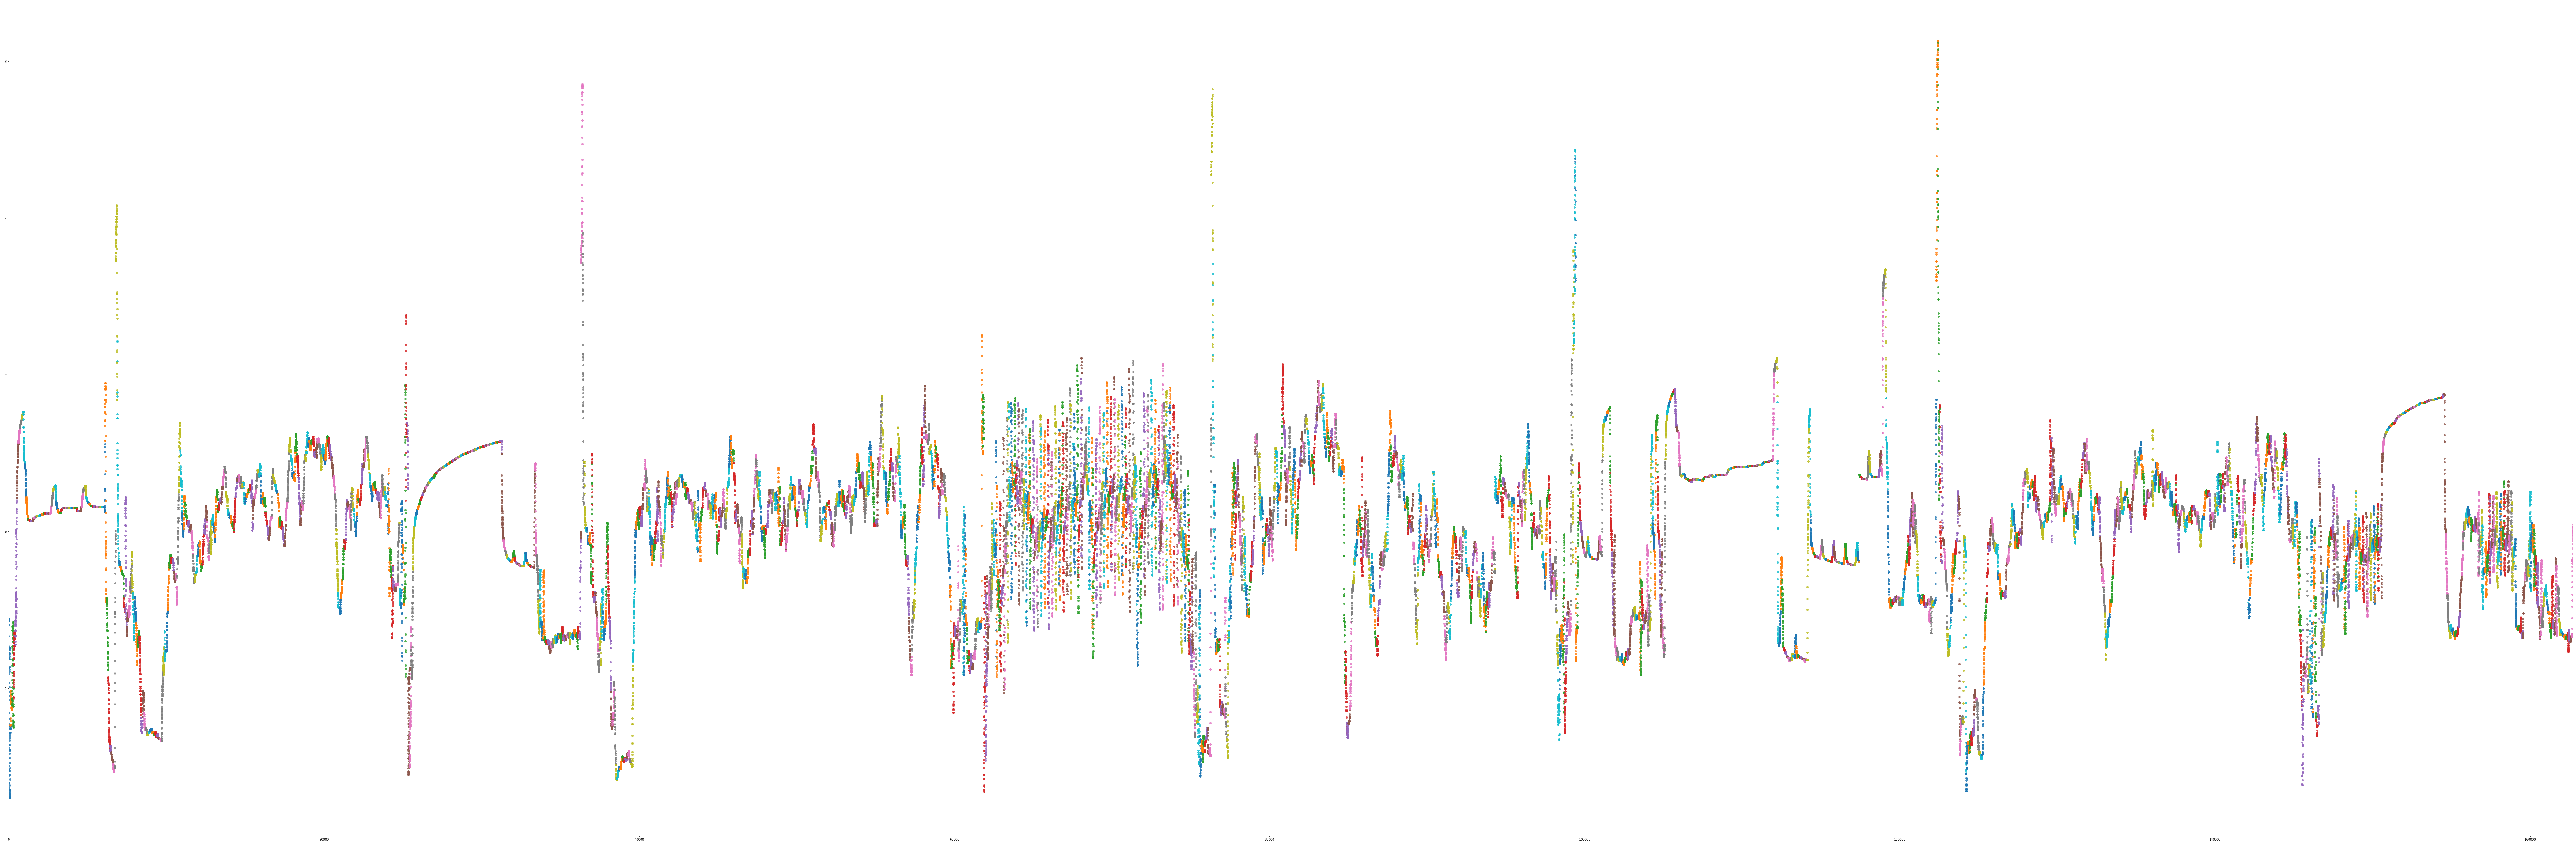

In [61]:
plt.rcParams['figure.figsize'] = [150, 50]

for c in df['day_cycle_window'].unique():
    df[df['day_cycle_window']==c]['p2'].plot(style='o', alpha=0.8)


Let's see what our parameter p2 looks like within a window (1_1_1)

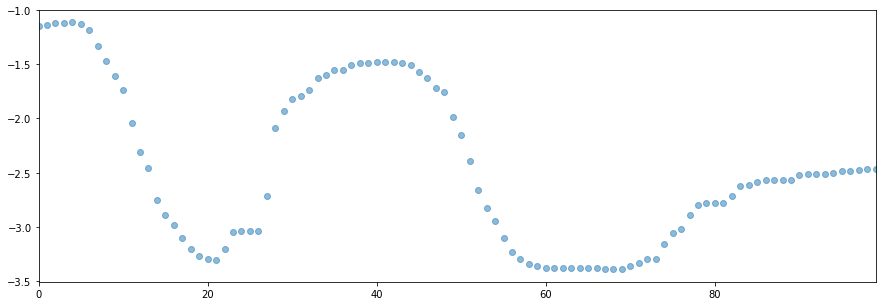

In [77]:
plt.rcParams['figure.figsize'] = [15, 5]
df[df['day_cycle_window']=='1_1_1']['p2'].plot(style='o', alpha=0.5)

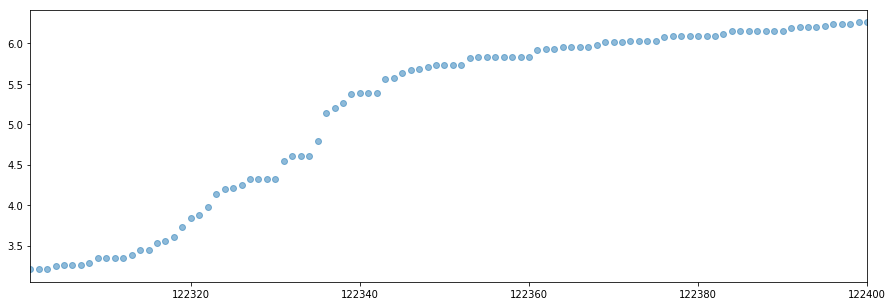

In [78]:
df[df['day_cycle_window']=='4_2_1']['p2'].plot(style='o', alpha=0.5)

## Exploring/Visualizing the data to find patterns and trends

In [104]:
df.describe()


p1             p2             p3             p4  \
count  162702.000000  162702.000000  162702.000000  162702.000000   
mean        0.000009       0.000011       0.000031       0.000005   
std         0.999950       0.999925       0.999961       0.999925   
min        -3.211980      -3.395387      -3.325651      -3.378450   
25%        -0.678808      -0.482716      -0.629123      -0.491585   
50%         0.041883       0.180360       0.041442       0.147397   
75%         0.743973       0.656920       0.659246       0.636887   
max         5.013899       6.260782       8.652950       8.359670   

                  p5             p6             p7             p8  \
count  162702.000000  162702.000000  162702.000000  162702.000000   
mean        0.000016      -0.000005      -0.000002       0.000003   
std         0.999963       0.999926       0.999950       0.999949   
min        -3.281286      -4.200181      -3.898025      -3.524957   
25%        -0.612334      -0.559023      -0.606135      -0.736398   
50%         0.117040       0.153972       0.186038      -0.012354   
75%         0.712393       0.685353       0.718237       0.802395   
max         6.424227       5.638259       3.735957       4.667058   

                  p9            p10            p11  
count  162702.000000  162702.000000  162702.000000  
mean       -0.000021       0.000026       0.000030  
std         0.997770       0.999686       0.999847  
min       -13.704556     -12.044778      -3.183571  
25%        -0.593096      -0.498480      -0.658530  
50%        -0.034882      -0.257635      -0.015437  
75%         0.508232       0.359773       0.636740  
max         8.203706       5.597387       9.204384




The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

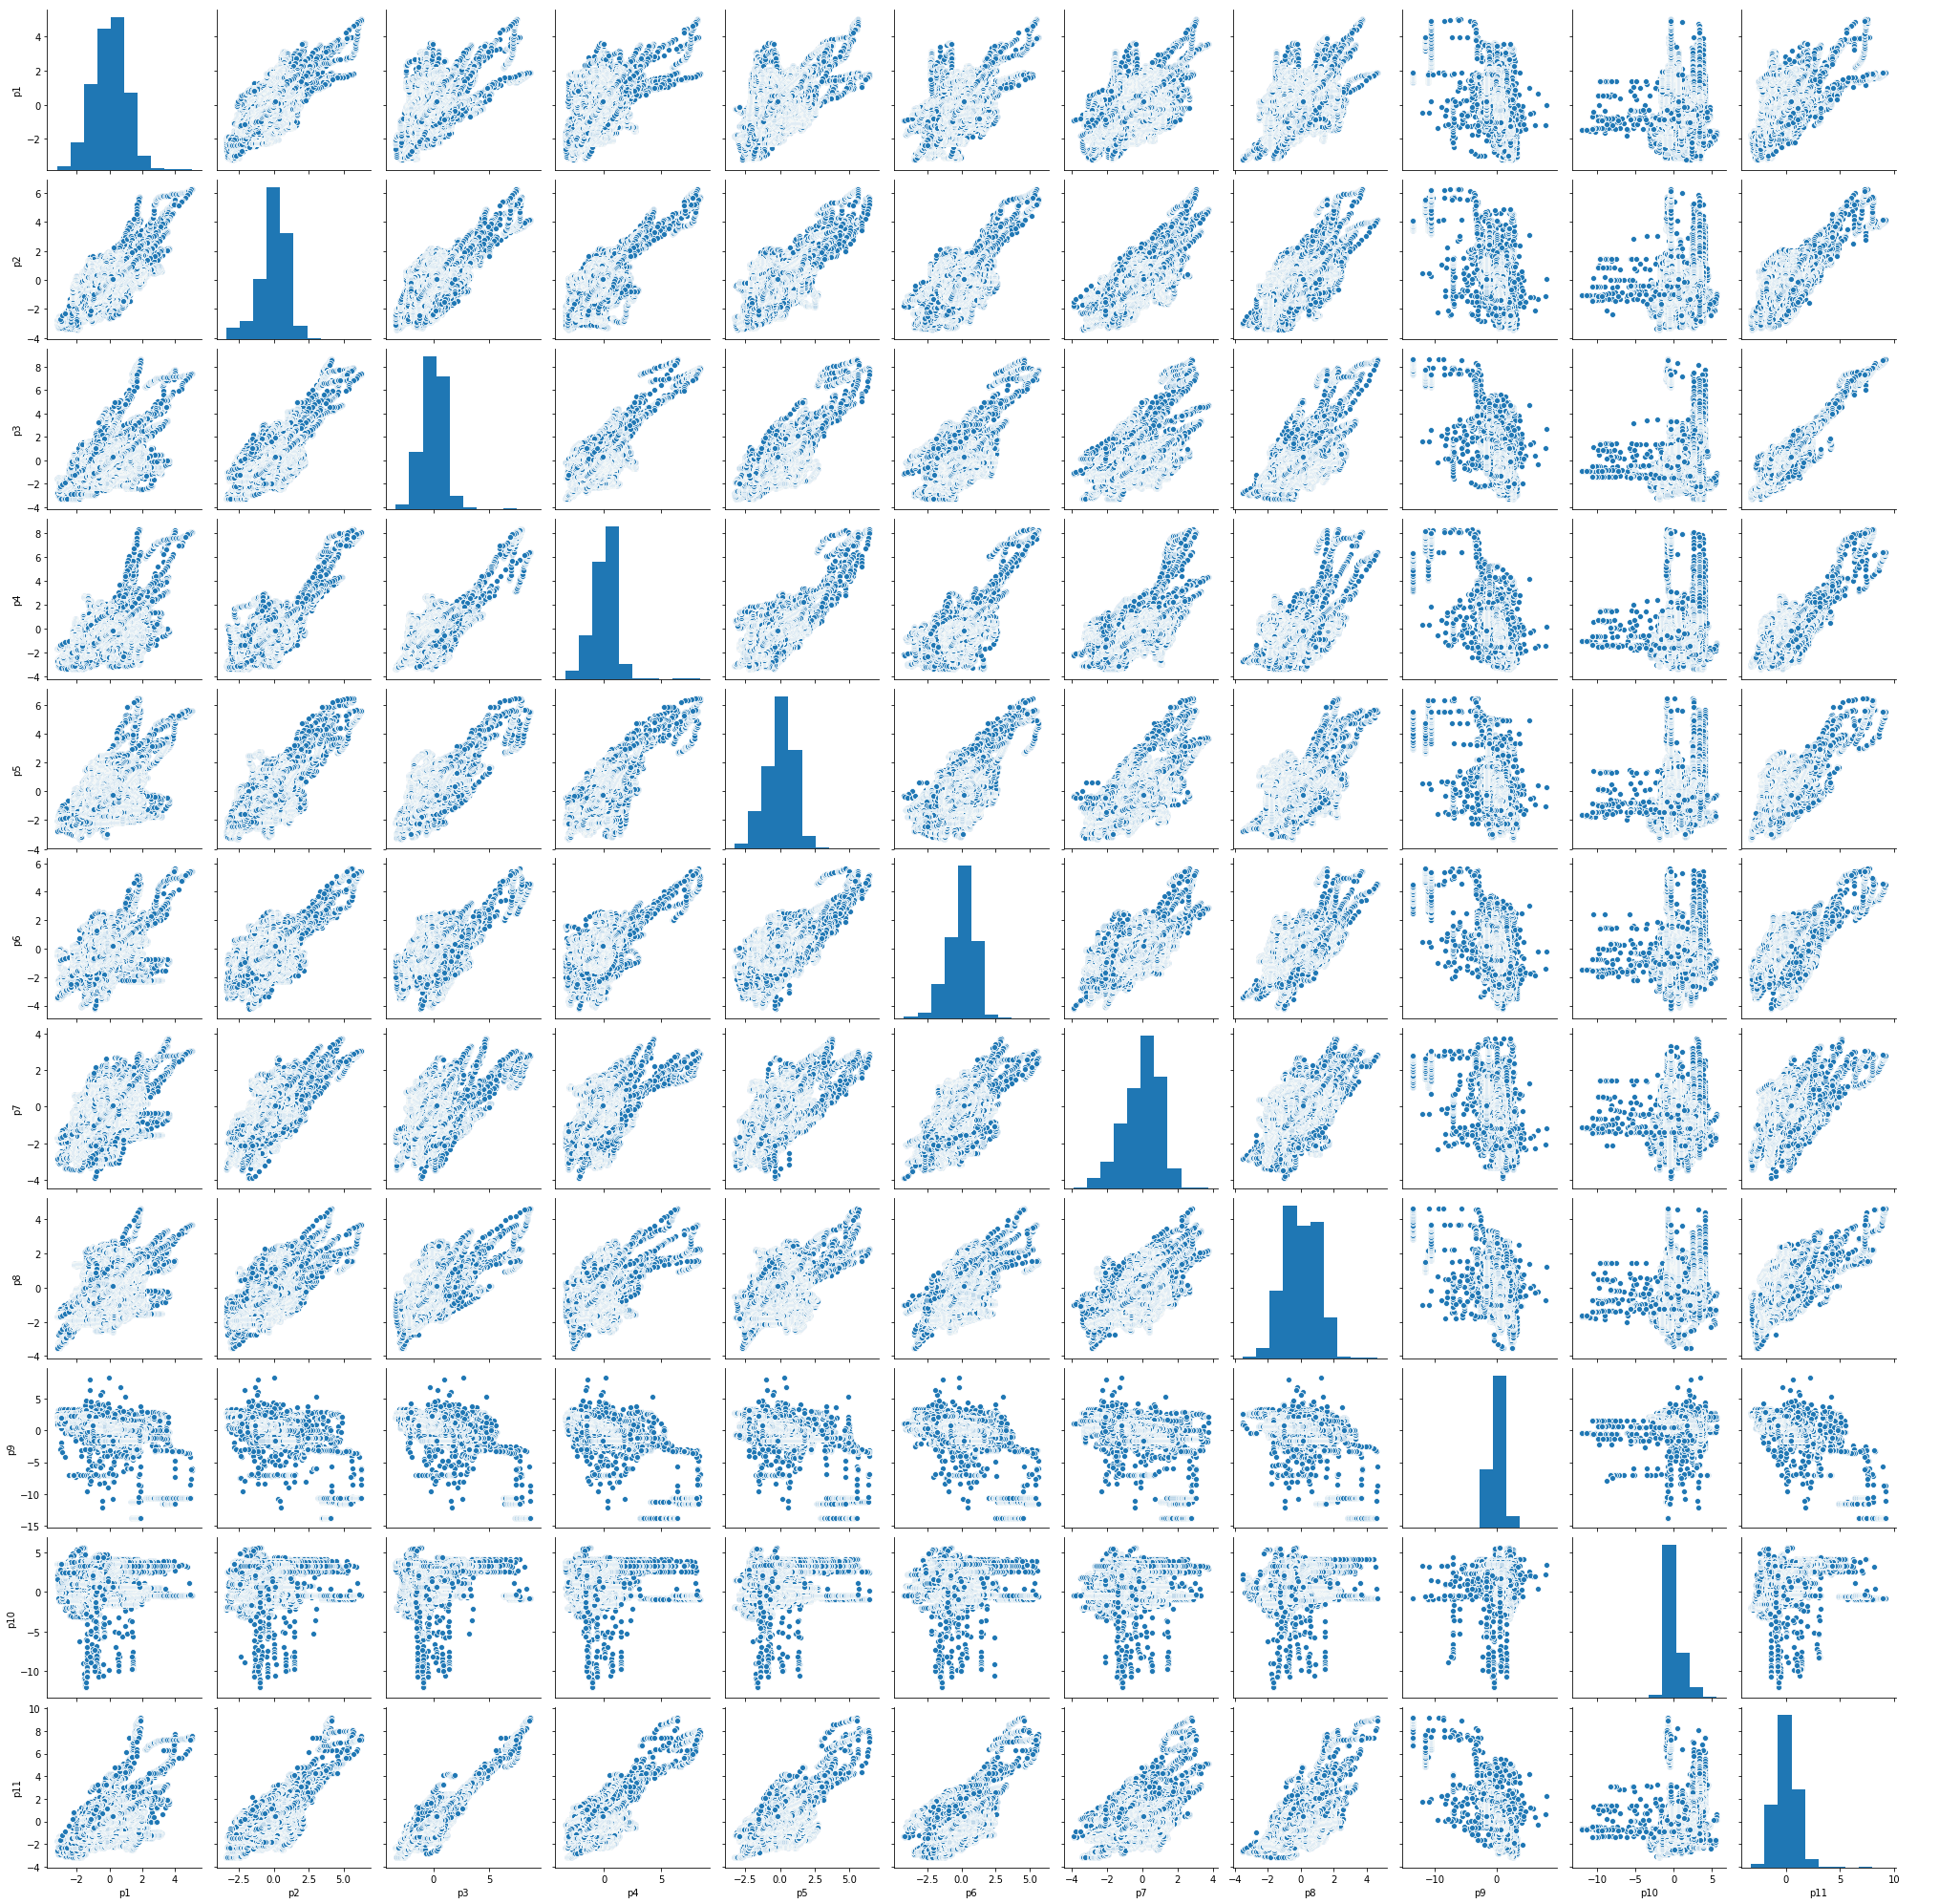

In [118]:
plt.rcParams['figure.figsize'] = [20, 20]
sns.pairplot(df[['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11']])

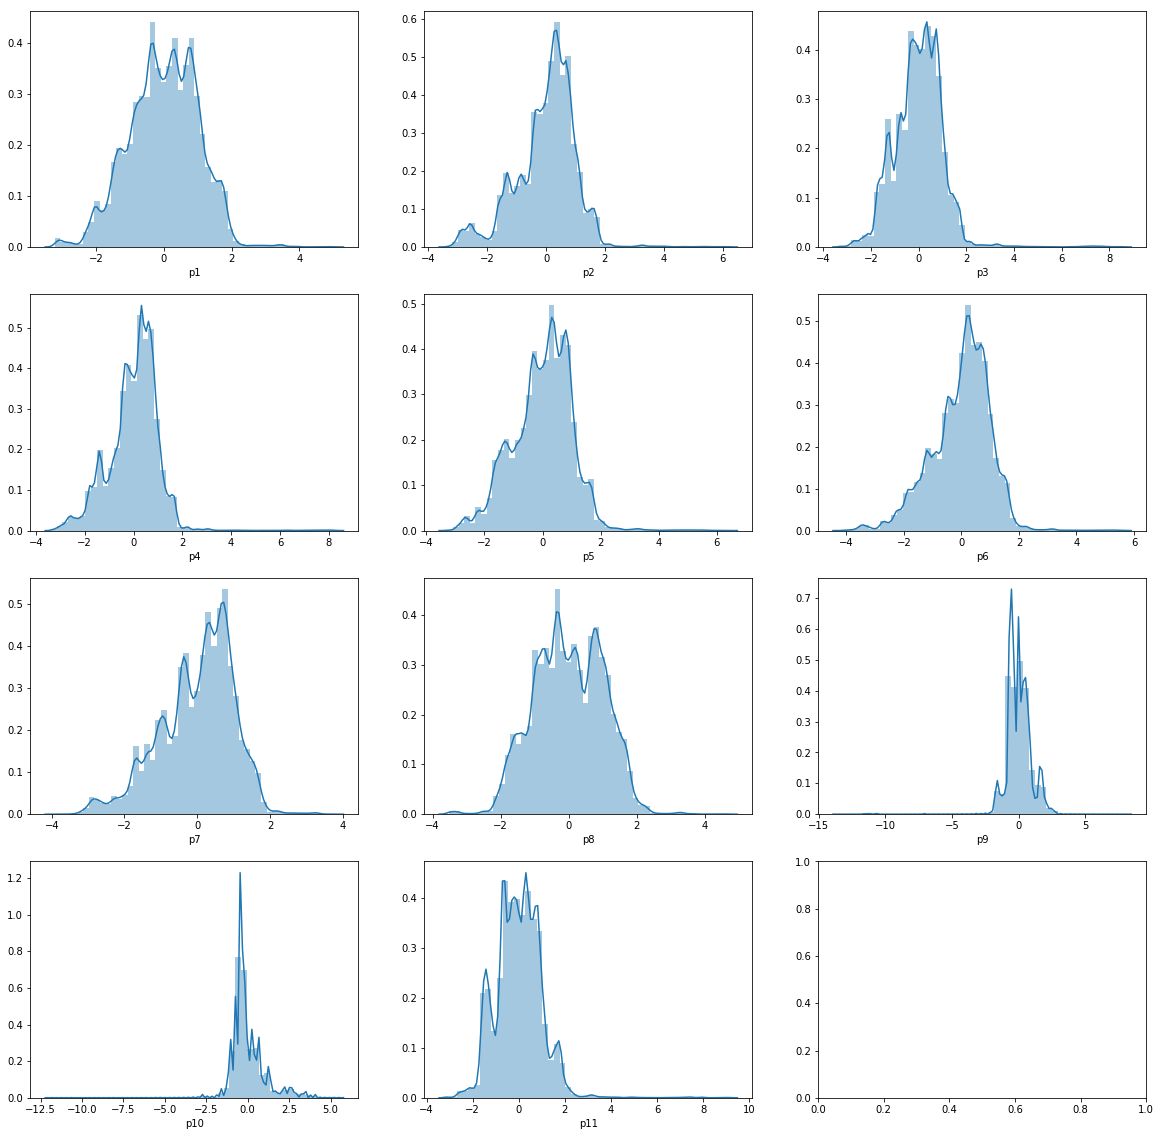

In [126]:
fig,axes=plt.subplots(nrows=4,ncols=3)
for i, column in enumerate(df[['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11']]):
    sns.distplot(df[column],ax=axes[i//3,i%3])

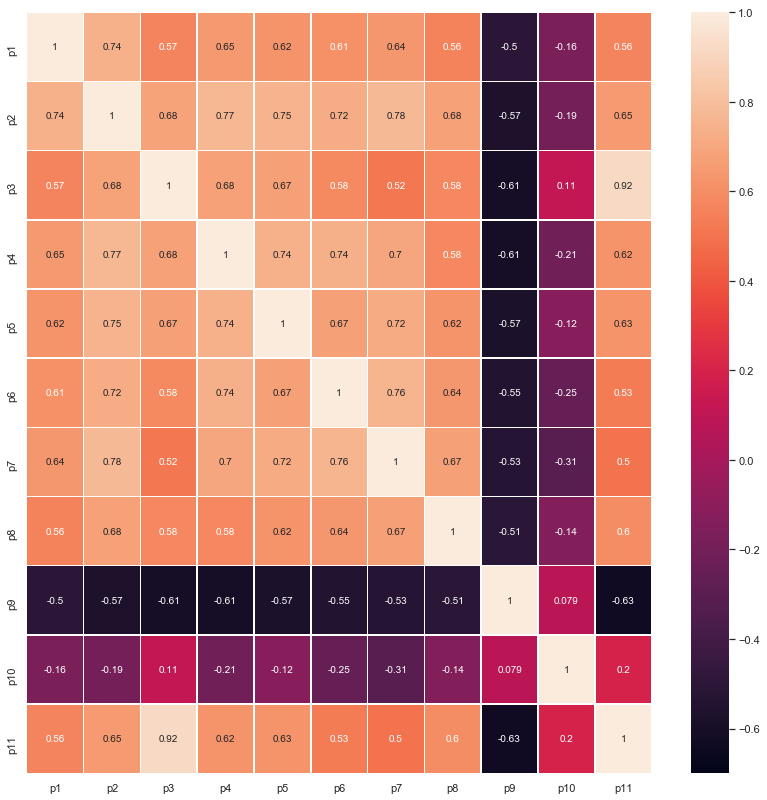

In [11]:
df_corr=df.corr(method='pearson')
dims = (14,14)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(df_corr, annot=True,linewidth=0.5, vmin=-.7,vmax=1)